# Olympic Medals

Since 1896, the Olympics have celebrated athleticism, sportsmanship and a healthy competitive spirit. This international sporting event features summer and winter sport competitions where thousands of athletes defy the frontiers of what we believe possible. A fantastic spectacle and inspiration to the masses, the olympics are a great opportunity to learn, gain exposure to less common sports and strengthen the global community.

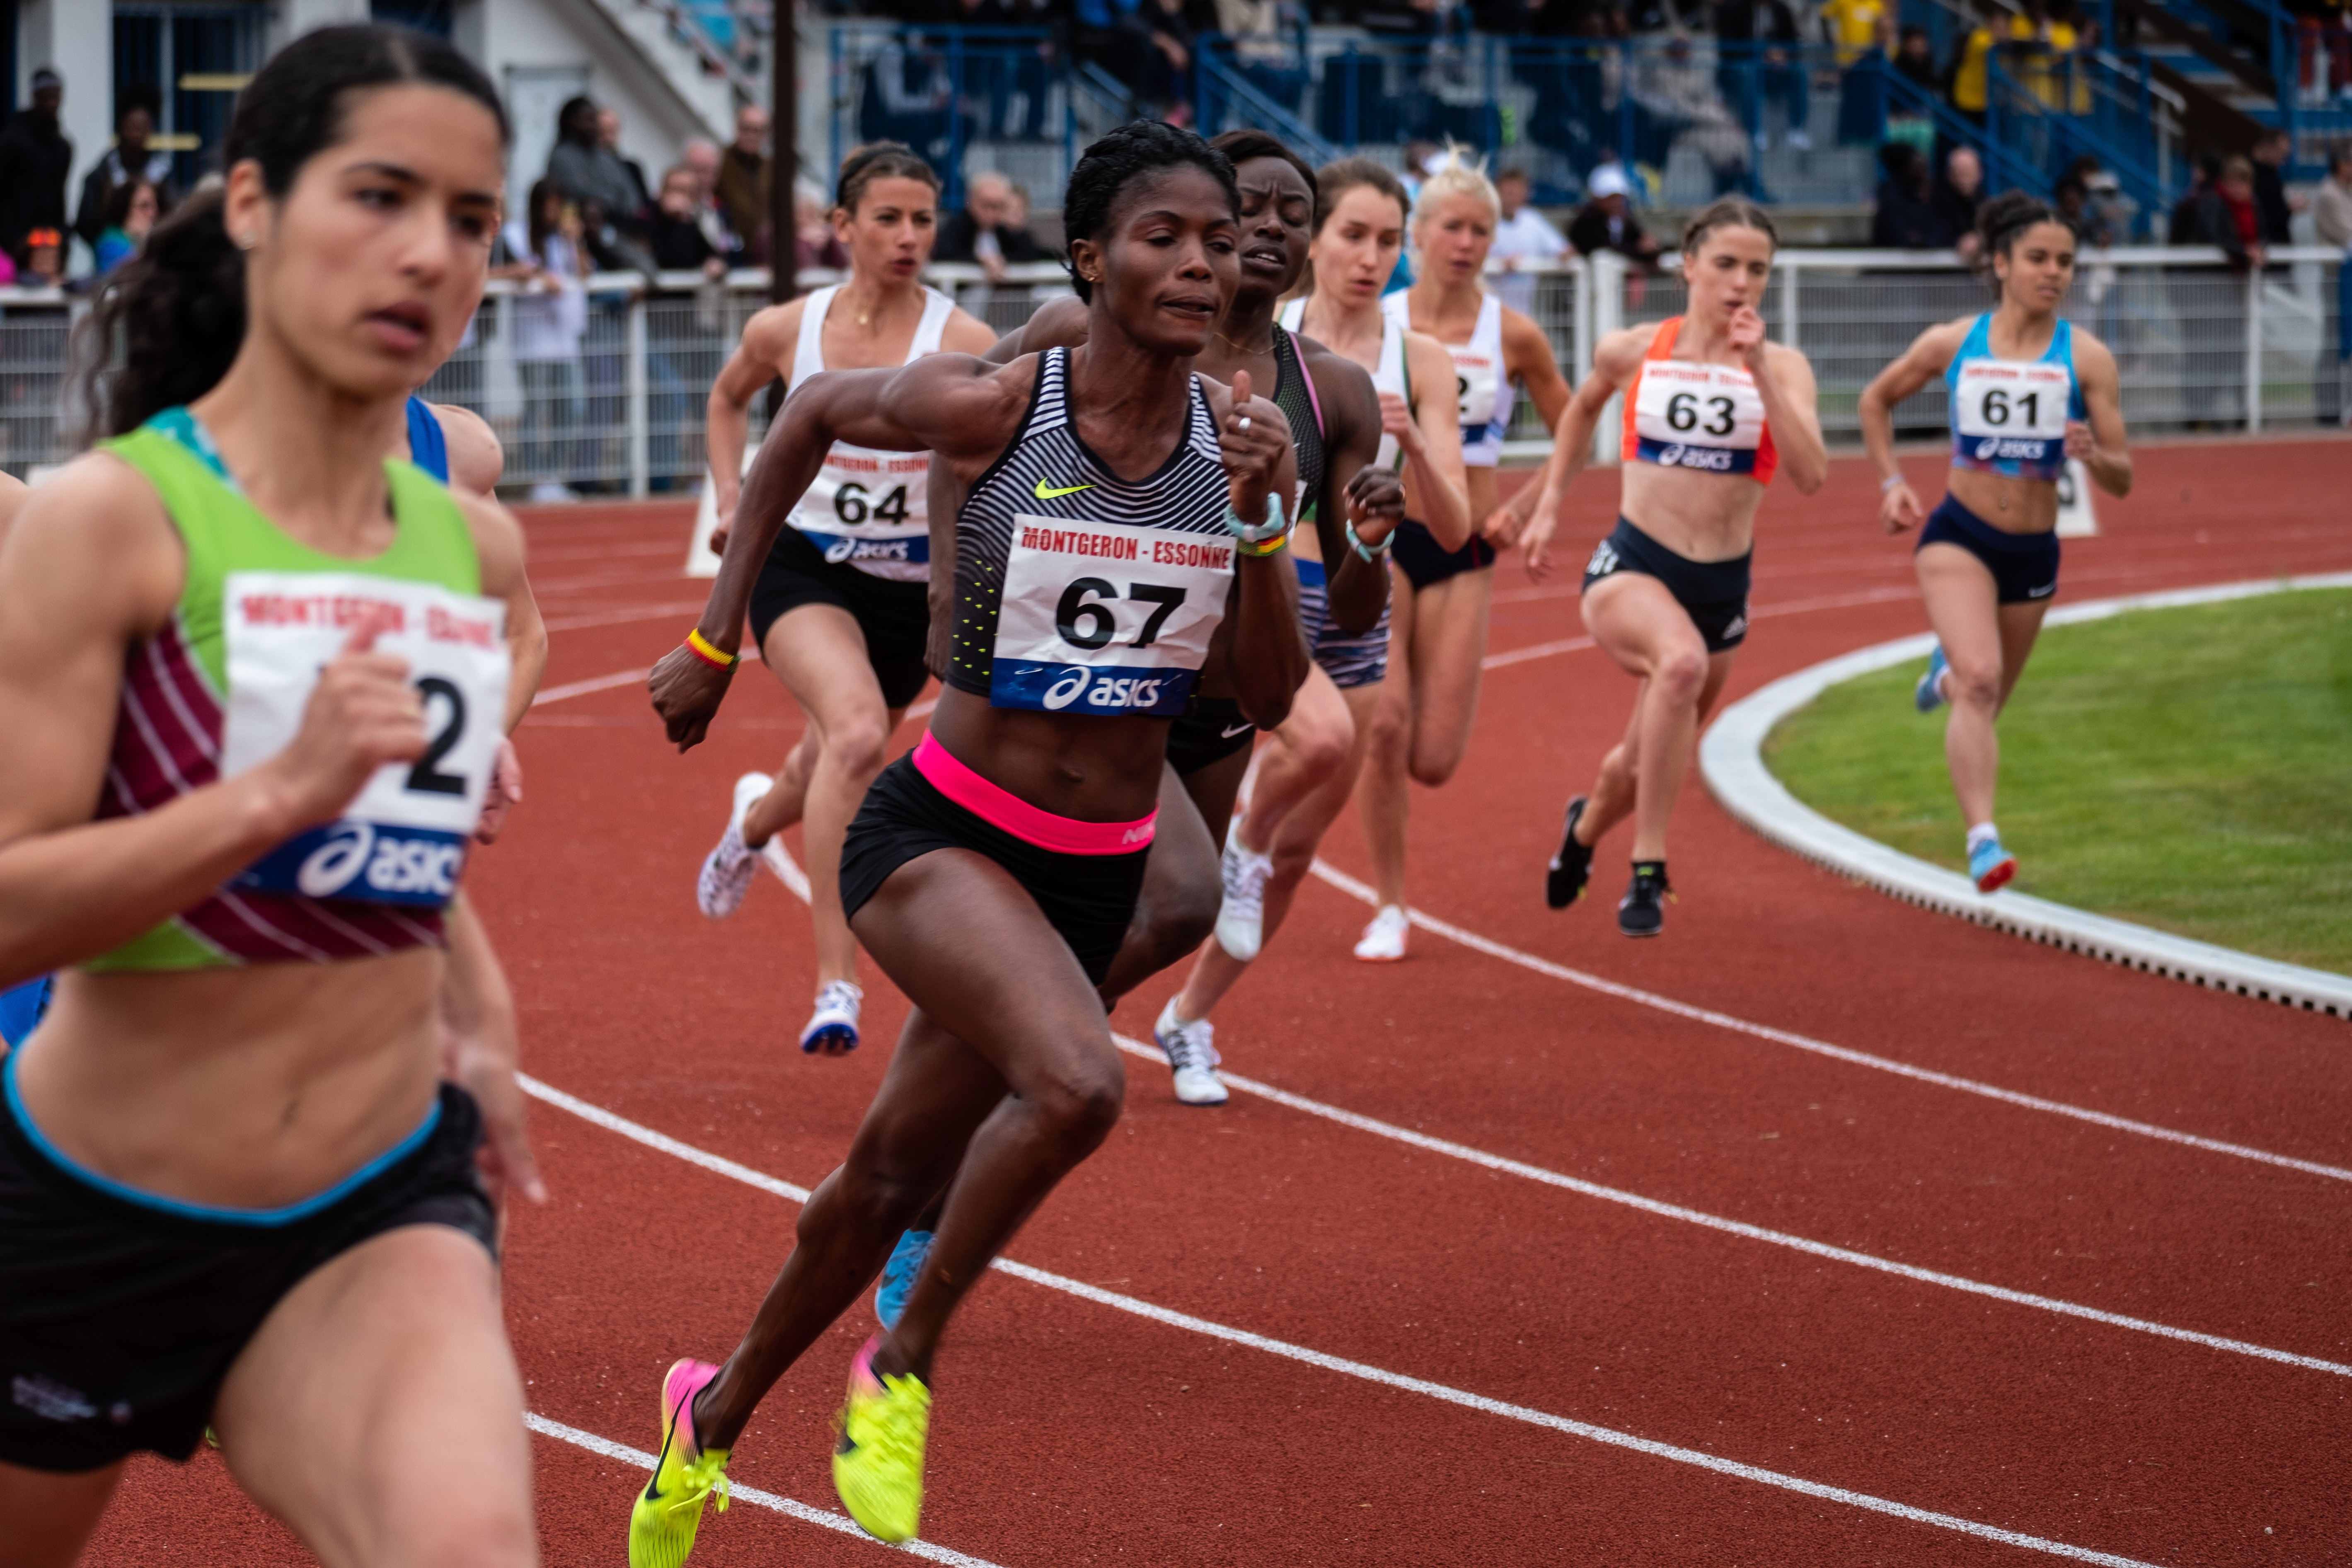

In this notebook, we will seek to answer the following questions :

1. Which countries are most successful at the Olympics?
2. Does country population influence country success in the Olympics?
3. Does country GDP influence country success in the Olympics?
4. Does the number of times a country has participated in the Olympics influence their success in the Olympics?
5. Does geogrpahic location influence a country's success in the Olympics?
6. Is there a country bias towards male vs female success in the Olympics?
7. Is there a trend in what could be known as "traditional sports"?


## Data Import and Inspection

Importing the Datasets. The dataset is a compilation of athletes who have received a medal at the olympics. For the purposes of this notebook, medals = success.  [Original Source](https://www.kaggle.com/the-guardian/olympic-games)


In [1]:
import pandas as pd

In [2]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [4]:
summer.head()

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [5]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [8]:
winter.head()

Year      City     Sport Discipline               Athlete Country Gender  \
0  1924  Chamonix  Biathlon   Biathlon           BERTHET, G.     FRA    Men   
1  1924  Chamonix  Biathlon   Biathlon        MANDRILLON, C.     FRA    Men   
2  1924  Chamonix  Biathlon   Biathlon   MANDRILLON, Maurice     FRA    Men   
3  1924  Chamonix  Biathlon   Biathlon       VANDELLE, André     FRA    Men   
4  1924  Chamonix  Biathlon   Biathlon  AUFDENBLATTEN, Adolf     SUI    Men   

             Event   Medal  
0  Military Patrol  Bronze  
1  Military Patrol  Bronze  
2  Military Patrol  Bronze  
3  Military Patrol  Bronze  
4  Military Patrol    Gold

In [9]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [10]:
dic.head()

Country Code  Population  GDP per Capita
0      Afghanistan  AFG  32526562.0      594.323081
1          Albania  ALB   2889167.0     3945.217582
2          Algeria  ALG  39666519.0     4206.031232
3  American Samoa*  ASA     55538.0             NaN
4          Andorra  AND     70473.0             NaN

In [11]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [109]:
#dic[dic.isnull().any(axis = 1)]

### Merging and Concatenating Summer and Winter files

Adding a column that specifies Summer or Winter Olympics Edition

In [13]:
olympics = pd.concat([summer, winter], axis = 0, keys = ["Summer", "Winter"],
                     names = ["Edition"]).reset_index().drop(columns = "level_1")

In [15]:
olympics.tail()

Edition  Year   City   Sport Discipline             Athlete Country  \
36930  Winter  2014  Sochi  Skiing  Snowboard        JONES, Jenny     GBR   
36931  Winter  2014  Sochi  Skiing  Snowboard     ANDERSON, Jamie     USA   
36932  Winter  2014  Sochi  Skiing  Snowboard  MALTAIS, Dominique     CAN   
36933  Winter  2014  Sochi  Skiing  Snowboard        SAMKOVA, Eva     CZE   
36934  Winter  2014  Sochi  Skiing  Snowboard    TRESPEUCH, Chloe     FRA   

      Gender            Event   Medal  
36930  Women       Slopestyle  Bronze  
36931  Women       Slopestyle    Gold  
36932  Women  Snowboard Cross  Silver  
36933  Women  Snowboard Cross    Gold  
36934  Women  Snowboard Cross  Bronze

Merging on country code to add country column to olympics data set

In [16]:
dic.head()

Country Code  Population  GDP per Capita
0      Afghanistan  AFG  32526562.0      594.323081
1          Albania  ALB   2889167.0     3945.217582
2          Algeria  ALG  39666519.0     4206.031232
3  American Samoa*  ASA     55538.0             NaN
4          Andorra  AND     70473.0             NaN

In [18]:
olympics = olympics.merge(dic.iloc[:, :2], how = "left", 
               left_on = "Country", right_on = "Code").drop(columns = ["Code"])

In [19]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Country_x   36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country_y   30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [20]:
olympics.reset_index(drop = True, inplace = True)

In [21]:
olympics

Edition  Year    City     Sport Discipline             Athlete  \
0      Summer  1896  Athens  Aquatics   Swimming       HAJOS, Alfred   
1      Summer  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto   
2      Summer  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios   
3      Summer  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis   
4      Summer  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon   
...       ...   ...     ...       ...        ...                 ...   
36930  Winter  2014   Sochi    Skiing  Snowboard        JONES, Jenny   
36931  Winter  2014   Sochi    Skiing  Snowboard     ANDERSON, Jamie   
36932  Winter  2014   Sochi    Skiing  Snowboard  MALTAIS, Dominique   
36933  Winter  2014   Sochi    Skiing  Snowboard        SAMKOVA, Eva   
36934  Winter  2014   Sochi    Skiing  Snowboard    TRESPEUCH, Chloe   

      Country_x Gender                       Event   Medal       Country_y  
0           HUN    Men              100M Freestyle    Gold         Hungary  
1           AUT    Men              100M Freestyle  Silver         Austria  
2           GRE    Men  100M Freestyle For Sailors  Bronze          Greece  
3           GRE    Men  100M Freestyle For Sailors    Gold          Greece  
4           GRE    Men  100M Freestyle For Sailors  Silver          Greece  
...         ...    ...                         ...     ...             ...  
36930       GBR  Women                  Slopestyle  Bronze  United Kingdom  
36931       USA  Women                  Slopestyle    Gold   United States  
36932       CAN  Women             Snowboard Cross  Silver          Canada  
36933       CZE  Women             Snowboard Cross    Gold  Czech Republic  
36934       FRA  Women             Snowboard Cross  Bronze          France  

[36935 rows x 11 columns]

### Data cleaning

In [22]:
olympics.rename(columns = {"Country_x":"Code", "Country_y": "Country"}, inplace = True)

In [23]:
dic.rename(columns = {"GDP per Capita":"GDP"}, inplace= True)

In [110]:
#olympics.columns

In [111]:
#dic.columns

In [26]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [27]:
olympics.loc[olympics.Country.isnull()]

Edition  Year         City   Sport        Discipline  \
132    Summer  1896       Athens  Tennis            Tennis   
133    Summer  1896       Athens  Tennis            Tennis   
134    Summer  1896       Athens  Tennis            Tennis   
135    Summer  1896       Athens  Tennis            Tennis   
136    Summer  1896       Athens  Tennis            Tennis   
...       ...   ...          ...     ...               ...   
33961  Winter  1992  Albertville  Skiing  Freestyle Skiing   
33977  Winter  1992  Albertville  Skiing       Ski Jumping   
33978  Winter  1992  Albertville  Skiing       Ski Jumping   
33979  Winter  1992  Albertville  Skiing       Ski Jumping   
33980  Winter  1992  Albertville  Skiing       Ski Jumping   

                        Athlete Code Gender            Event   Medal Country  
132                FLACK, Edwin  ZZX    Men          Doubles  Bronze     NaN  
133    ROBERTSON, George Stuart  ZZX    Men          Doubles  Bronze     NaN  
134                BOLAND, John  ZZX    Men          Doubles    Gold     NaN  
135            TRAUN, Friedrich  ZZX    Men          Doubles    Gold     NaN  
136        KASDAGLIS, Dionysios  ZZX    Men          Doubles  Silver     NaN  
...                         ...  ...    ...              ...     ...     ...  
33961  KOZHEVNIKOVA, Yelizaveta  EUN  Women           Moguls  Silver     NaN  
33977              GODER, Tomas  TCH    Men  K120 Team (90M)  Bronze     NaN  
33978            JEZ, Frantisek  TCH    Men  K120 Team (90M)  Bronze     NaN  
33979               PARMA, Jiri  TCH    Men  K120 Team (90M)  Bronze     NaN  
33980          SAKALA, Jaroslav  TCH    Men  K120 Team (90M)  Bronze     NaN  

[6367 rows x 11 columns]

Our new "Country" column seems to be missing some entries. In the following section, we will explore which country codes we are missing Country data from and will fill it in. 

In [112]:
missing_C_index = olympics.loc[olympics.Country.isnull()].index

In [113]:
old_c = olympics.loc[olympics.Country.isnull(), :].Code.value_counts().index

In [31]:
mapper = pd.Series(index=old_c, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [114]:
#mapper

In [115]:
#olympics.loc[missing_C_index, "Code"].map(mapper)

In [34]:
olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)

In [35]:
olympics.loc[missing_C_index]

Edition  Year         City   Sport        Discipline  \
132    Summer  1896       Athens  Tennis            Tennis   
133    Summer  1896       Athens  Tennis            Tennis   
134    Summer  1896       Athens  Tennis            Tennis   
135    Summer  1896       Athens  Tennis            Tennis   
136    Summer  1896       Athens  Tennis            Tennis   
...       ...   ...          ...     ...               ...   
33961  Winter  1992  Albertville  Skiing  Freestyle Skiing   
33977  Winter  1992  Albertville  Skiing       Ski Jumping   
33978  Winter  1992  Albertville  Skiing       Ski Jumping   
33979  Winter  1992  Albertville  Skiing       Ski Jumping   
33980  Winter  1992  Albertville  Skiing       Ski Jumping   

                        Athlete Code Gender            Event   Medal  \
132                FLACK, Edwin  ZZX    Men          Doubles  Bronze   
133    ROBERTSON, George Stuart  ZZX    Men          Doubles  Bronze   
134                BOLAND, John  ZZX    Men          Doubles    Gold   
135            TRAUN, Friedrich  ZZX    Men          Doubles    Gold   
136        KASDAGLIS, Dionysios  ZZX    Men          Doubles  Silver   
...                         ...  ...    ...              ...     ...   
33961  KOZHEVNIKOVA, Yelizaveta  EUN  Women           Moguls  Silver   
33977              GODER, Tomas  TCH    Men  K120 Team (90M)  Bronze   
33978            JEZ, Frantisek  TCH    Men  K120 Team (90M)  Bronze   
33979               PARMA, Jiri  TCH    Men  K120 Team (90M)  Bronze   
33980          SAKALA, Jaroslav  TCH    Men  K120 Team (90M)  Bronze   

              Country  
132       Mixed teams  
133       Mixed teams  
134       Mixed teams  
135       Mixed teams  
136       Mixed teams  
...               ...  
33961    Unified Team  
33977  Czechoslovakia  
33978  Czechoslovakia  
33979  Czechoslovakia  
33980  Czechoslovakia  

[6367 rows x 11 columns]

In [36]:
olympics[olympics.Code.isna()]

Edition  Year    City          Sport           Discipline  \
29603  Summer  2012  London      Athletics            Athletics   
31072  Summer  2012  London  Weightlifting        Weightlifting   
31091  Summer  2012  London  Weightlifting        Weightlifting   
31110  Summer  2012  London      Wrestling  Wrestling Freestyle   

               Athlete Code Gender     Event   Medal Country  
29603          Pending  NaN  Women     1500M    Gold     NaN  
31072          Pending  NaN  Women      63KG    Gold     NaN  
31091          Pending  NaN    Men      94KG  Silver     NaN  
31110  KUDUKHOV, Besik  NaN    Men  Wf 60 KG  Silver     NaN

In [37]:
olympics.dropna(subset = ["Code"], inplace = True)

In [38]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [39]:
olympics.reset_index(drop = True, inplace = True)

In [116]:
#olympics.nunique()

In [41]:
olympics.Medal = olympics.Medal.astype("category") 

In [42]:
#olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     36931 non-null  object  
 1   Year        36931 non-null  int64   
 2   City        36931 non-null  object  
 3   Sport       36931 non-null  object  
 4   Discipline  36931 non-null  object  
 5   Athlete     36931 non-null  object  
 6   Code        36931 non-null  object  
 7   Gender      36931 non-null  object  
 8   Event       36931 non-null  object  
 9   Medal       36931 non-null  category
 10  Country     36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


In [43]:
olympics.Medal.sort_values() #sorting alphabetically

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [44]:
olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True) 

In [45]:
olympics.Medal.sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

### Which countries are most successful across time?

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [48]:
top_10 = olympics.Country.value_counts().head(10)
top_10

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

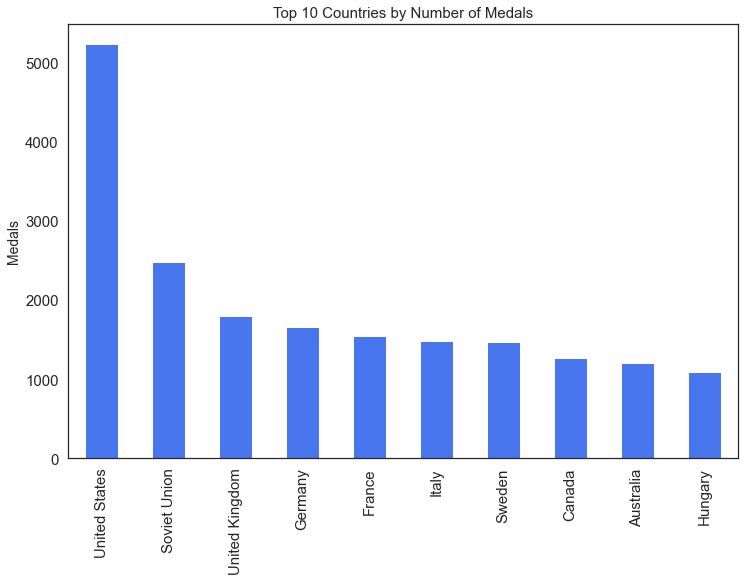

In [107]:
top_10.plot(kind = "bar", fontsize = 15, figsize=(12,8))
plt.title("Top 10 Countries by Number of Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

In the graph above we see the top 10 most successful countries. 

In [50]:
olympics_10 = olympics[olympics.Country.isin(top_10.index)]
olympics_10

Edition  Year    City      Sport Discipline             Athlete Code  \
0      Summer  1896  Athens   Aquatics   Swimming       HAJOS, Alfred  HUN   
6      Summer  1896  Athens   Aquatics   Swimming       HAJOS, Alfred  HUN   
11     Summer  1896  Athens  Athletics  Athletics       LANE, Francis  USA   
12     Summer  1896  Athens  Athletics  Athletics    SZOKOLYI, Alajos  HUN   
13     Summer  1896  Athens  Athletics  Athletics       BURKE, Thomas  USA   
...       ...   ...     ...        ...        ...                 ...  ...   
36924  Winter  2014   Sochi     Skiing  Snowboard       KOBER, Amelie  GER   
36926  Winter  2014   Sochi     Skiing  Snowboard        JONES, Jenny  GBR   
36927  Winter  2014   Sochi     Skiing  Snowboard     ANDERSON, Jamie  USA   
36928  Winter  2014   Sochi     Skiing  Snowboard  MALTAIS, Dominique  CAN   
36930  Winter  2014   Sochi     Skiing  Snowboard    TRESPEUCH, Chloe  FRA   

      Gender            Event   Medal         Country  
0        Men   100M Freestyle    Gold         Hungary  
6        Men  1200M Freestyle    Gold         Hungary  
11       Men             100M  Bronze   United States  
12       Men             100M  Bronze         Hungary  
13       Men             100M    Gold   United States  
...      ...              ...     ...             ...  
36924  Women  Parallel Slalom  Bronze         Germany  
36926  Women       Slopestyle  Bronze  United Kingdom  
36927  Women       Slopestyle    Gold   United States  
36928  Women  Snowboard Cross  Silver          Canada  
36930  Women  Snowboard Cross  Bronze          France  

[19273 rows x 11 columns]

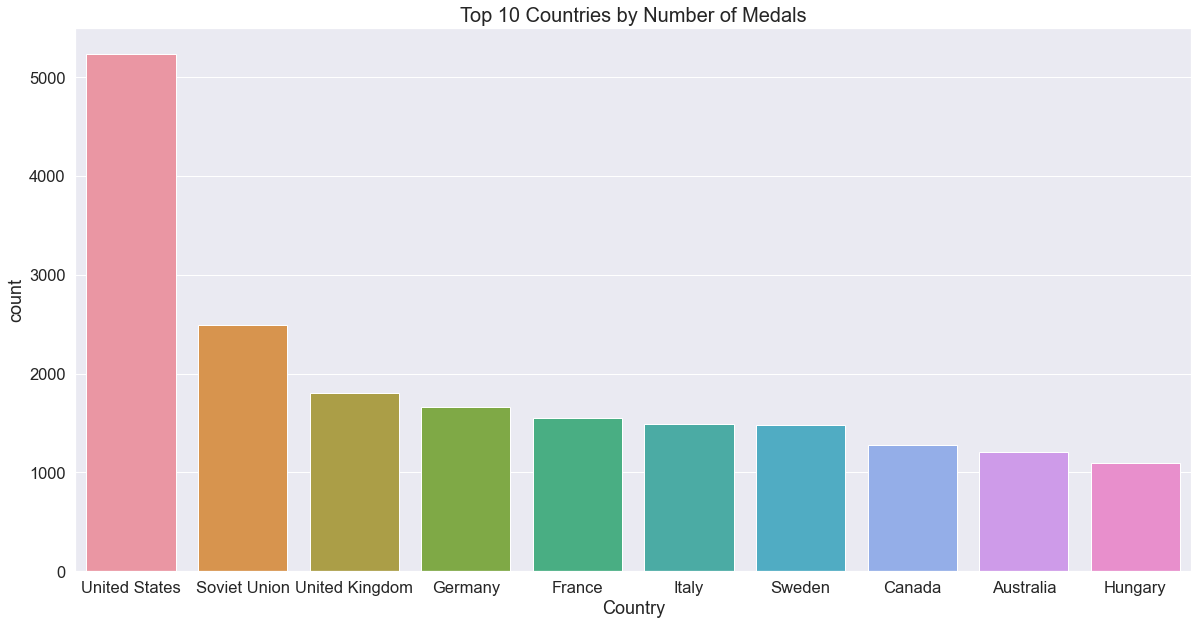

In [108]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= 'turbo')
sns.countplot(data = olympics_10, x = "Country", order = top_10.index)
plt.title("Top 10 Countries by Number of Medals", fontsize = 20)
plt.show()

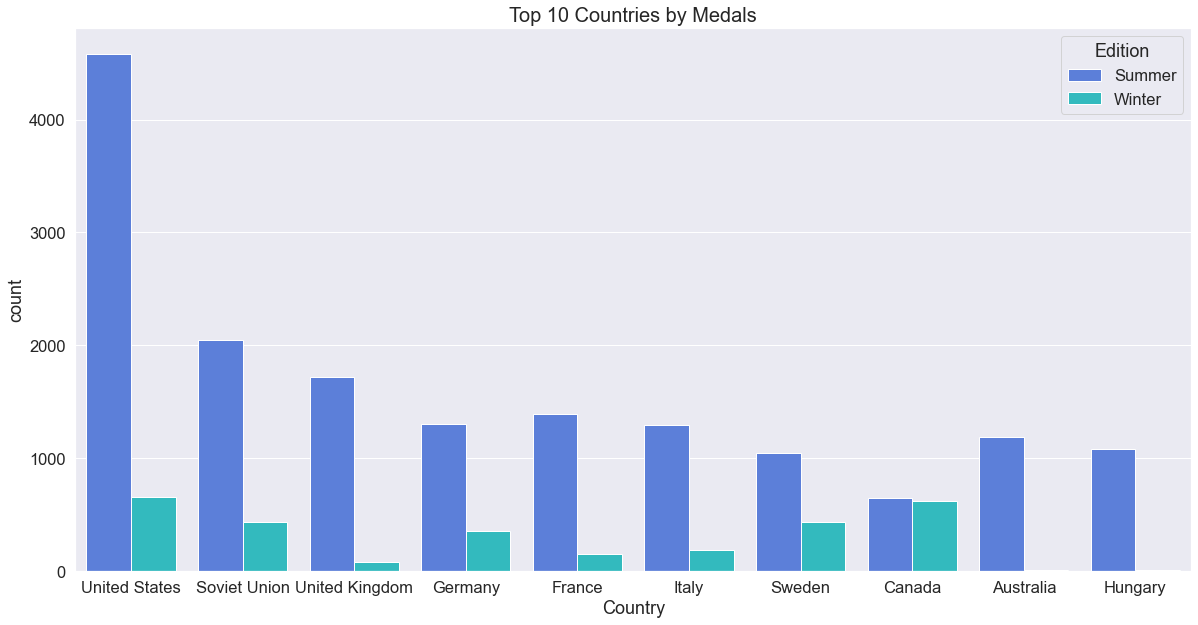

In [59]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "turbo")
sns.countplot(data = olympics_10, x = "Country", hue = "Edition", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

The graph above displays the number of Medals each country earned each edition.

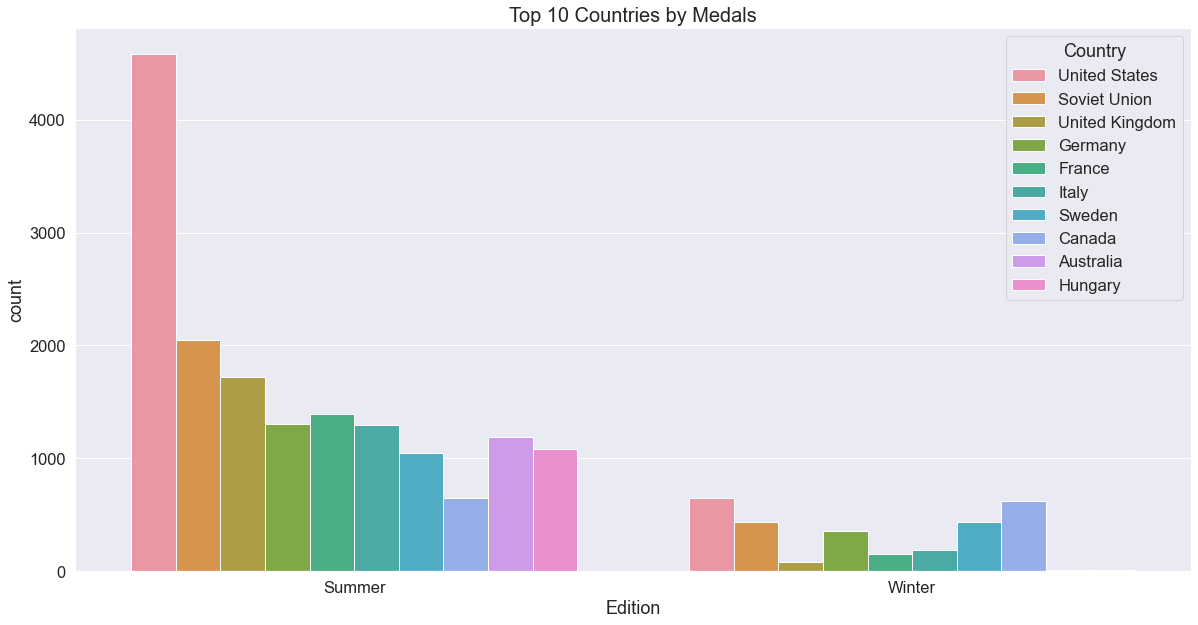

In [60]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "turbo")
sns.countplot(data = olympics_10, x = "Edition", hue = "Country", hue_order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

It is evident that the Summer Edition of the games has more sports and thus more medals awarded.

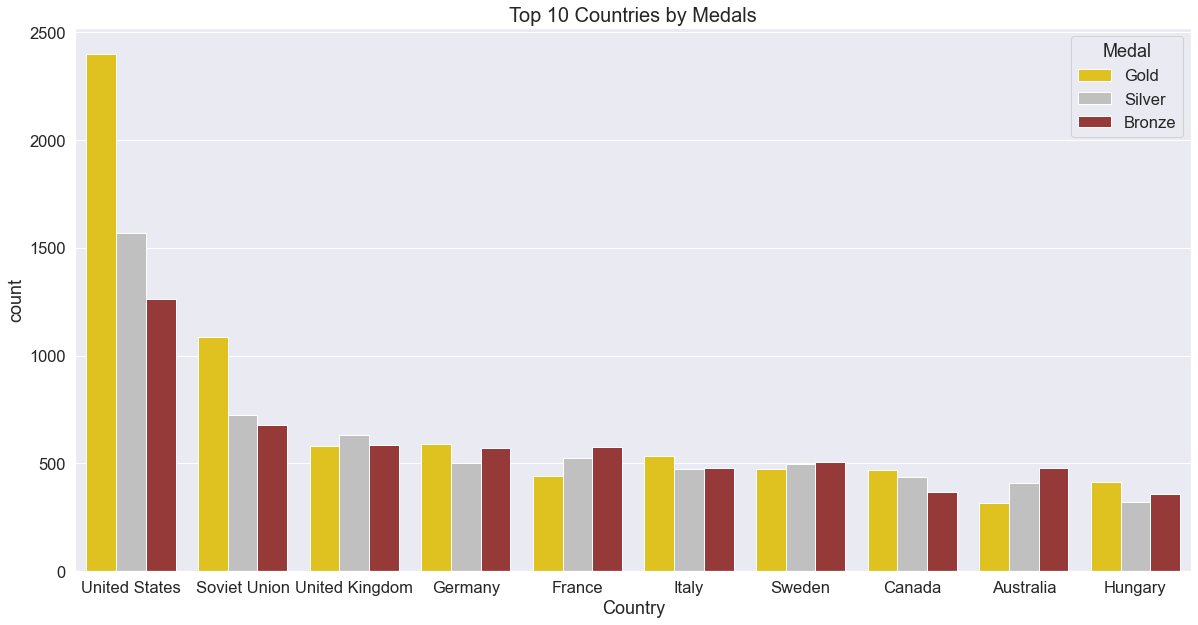

In [61]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "turbo")
sns.countplot(data = olympics_10, x = "Country", hue = "Medal", order = top_10.index,
              hue_order = ["Gold", "Silver", "Bronze"], palette = ["gold", "silver", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

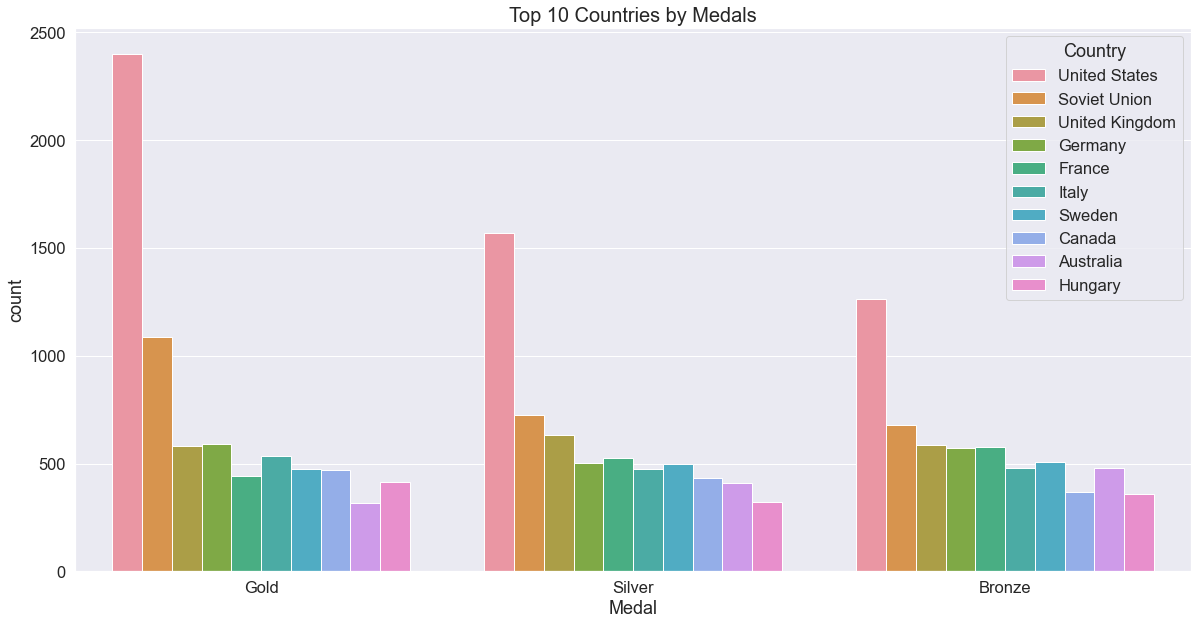

In [62]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "turbo")
sns.countplot(data = olympics_10, x = "Medal", hue = "Country", 
              order = ["Gold", "Silver", "Bronze"], hue_order= top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

### Do socioeconomic factors like GDP, government, politics and population play a role in the Olympics?

To explore these questions, we need to set up our data set to contain the total number of medals and the total number of Olympic games they have participated in. 


In [68]:
medals_per_country = pd.crosstab(index = olympics.Country, columns = olympics.Medal, 
                                 margins = True, margins_name= "Total")
medals_per_country

Medal                   Bronze  Silver   Gold  Total
Country                                             
Afghanistan                  2       0      0      2
Algeria                      8       2      5     15
Argentina                   91      99     69    259
Armenia                      8       2      1     11
Australasia                  5       4     20     29
...                        ...     ...    ...    ...
West Indies Federation       5       0      0      5
Yugoslavia                 119     180    143    442
Zambia                       1       1      0      2
Zimbabwe                     1       4     18     23
Total                    12288   12238  12405  36931

[146 rows x 4 columns]

In [69]:
medals_per_country.drop("Total", axis = 0, inplace = True)

In [71]:
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"]].sort_values(by = ["Total", "Gold", "Silver", "Bronze"], ascending = False)

In [72]:
medals_per_country.head(50)

Medal                    Total  Gold  Silver  Bronze
Country                                             
United States             5238  2402    1571    1265
Soviet Union              2489  1088     724     677
United Kingdom            1799   580     632     587
Germany                   1665   589     504     572
France                    1548   444     526     578
Italy                     1488   534     473     481
Sweden                    1477   476     496     505
Canada                    1274   470     435     369
Australia                 1204   317     408     479
Hungary                   1091   412     320     359
Russia                    1031   333     328     370
Norway                    1011   368     371     272
East Germany               987   387     321     279
Netherlands                973   275     317     381
Finland                    890   190     267     433
China                      889   306     326     257
Japan                      851   230     294     327
Switzerland                665   151     244     270
Romania                    642   157     195     290
Korea, South               616   209     230     177
West Germany               584   166     191     227
Poland                     538   112     184     242
Denmark                    512   150     202     160
Czechoslovakia             487    82     224     181
Spain                      444    99     227     118
Yugoslavia                 442   143     180     119
Brazil                     431    73     173     185
Austria                    426   100     179     147
Belgium                    424    93     172     159
Cuba                       410   165     129     116
Bulgaria                   339    54     145     140
Unified Team               283   128      75      80
Unified Team of Germany    281    76     108      97
Argentina                  259    69      99      91
New Zealand                191    85      31      75
India                      184   128      18      38
Ukraine                    184    46      43      95
Greece                     148    34      62      52
Czech Republic             131    42      34      55
Belarus                    128    23      41      64
Jamaica                    127    31      49      47
Croatia                    125    50      40      35
Pakistan                   121    42      45      34
Mexico                     106    32      23      51
South Africa               106    30      39      37
Kenya                       93    28      35      30
Turkey                      86    38      25      23
Nigeria                     84    19      38      27
Uruguay                     76    44       2      30
Iran                        61    16      21      24

In [117]:
#dic

In [74]:
medals_per_country = medals_per_country.merge(dic, how = "left", left_index = True, 
                                              right_on = "Country").drop(columns = ["Code"]).set_index("Country")

In [119]:
#medals_per_country

In [76]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

In [77]:
olympics["Games"] = olympics.apply(lambda x: str(x.Year) + " " + x.City, axis = 1)

In [78]:
olympics.Games.nunique()

49

In [79]:
olympics.Games.value_counts()

2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1945
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1956 Melbourne / Stockholm      885
1912 Stockholm                  885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris                  

In [80]:
olympics.groupby("Country").apply(lambda x: x.Games.nunique())

Country
Afghanistan                2
Algeria                    6
Argentina                 18
Armenia                    4
Australasia                2
                          ..
West Germany              12
West Indies Federation     1
Yugoslavia                18
Zambia                     2
Zimbabwe                   3
Length: 145, dtype: int64

Adding the number of times each Country has participated in the Olympics

In [81]:
medals_per_country["Total_Games"] = olympics.groupby("Country").apply(lambda x: x.Games.nunique())

In [82]:
medals_per_country.rank(ascending = False).head(50)

Total  Gold  Silver  Bronze  Population    GDP  \
Country                                                                   
United States              1.0   1.0     1.0     1.0         3.0    7.0   
Soviet Union               2.0   2.0     2.0     2.0         NaN    NaN   
United Kingdom             3.0   4.0     3.0     3.0        20.0   13.0   
Germany                    4.0   3.0     5.0     5.0        15.0   18.0   
France                     5.0   8.0     4.0     4.0        19.0   22.0   
Italy                      6.0   5.0     7.0     7.0        21.0   25.0   
Sweden                     7.0   6.0     6.0     6.0        71.0   10.0   
Canada                     8.0   7.0     8.0    12.0        35.0   15.0   
Australia                  9.0  13.0     9.0     8.0        46.0    6.0   
Hungary                   10.0   9.0    14.0    13.0        70.0   48.0   
Russia                    11.0  12.0    11.0    11.0         8.0   57.0   
Norway                    12.0  11.0    10.0    17.0        90.0    3.0   
East Germany              13.0  10.0    13.0    16.0         NaN    NaN   
Netherlands               14.0  15.0    15.0    10.0        55.0   12.0   
Finland                   15.0  18.0    17.0     9.0        88.0   17.0   
China                     16.0  14.0    12.0    19.0         1.0   63.0   
Japan                     17.0  16.0    16.0    14.0        10.0   24.0   
Switzerland               18.0  22.0    18.0    18.0        78.0    2.0   
Romania                   19.0  21.0    23.0    15.0        51.0   59.0   
Korea, South              20.0  17.0    19.0    24.0        24.0   27.0   
West Germany              21.0  19.0    24.0    21.0         NaN    NaN   
Poland                    22.0  27.0    25.0    20.0        33.0   47.0   
Denmark                   23.0  23.0    22.0    25.0        86.0    9.0   
Czechoslovakia            24.0  32.0    21.0    23.0         NaN    NaN   
Spain                     25.0  29.0    20.0    30.0        26.0   28.0   
Yugoslavia                26.0  24.0    26.0    29.0         NaN    NaN   
Brazil                    27.0  34.0    28.0    22.0         5.0   60.0   
Austria                   28.0  28.0    27.0    27.0        75.0   14.0   
Belgium                   29.0  30.0    29.0    26.0        62.0   20.0   
Cuba                      30.0  20.0    31.0    31.0        61.0    NaN   
Bulgaria                  31.0  36.0    30.0    28.0        81.0   64.0   
Unified Team              32.0  25.5    34.0    35.0         NaN    NaN   
Unified Team of Germany   33.0  33.0    32.0    32.0         NaN    NaN   
Argentina                 34.0  35.0    33.0    34.0        29.0   44.0   
New Zealand               35.0  31.0    45.0    36.0        93.0   21.0   
India                     36.5  25.5    52.0    43.0         2.0  100.0   
Ukraine                   36.5  38.0    38.0    33.0        28.0   96.0   
Greece                    38.0  43.0    35.0    39.0        65.0   35.0   
Czech Republic            39.0  40.5    44.0    38.0        67.0   36.0   
Belarus                   40.0  48.5    39.0    37.0        73.0   71.0   
Jamaica                   41.0  45.0    36.0    41.0       104.0   75.0   
Croatia                   42.0  37.0    40.0    45.0        94.0   49.0   
Pakistan                  43.0  40.5    37.0    46.0         6.0  101.0   
Mexico                    44.5  44.0    48.0    40.0         9.0   58.0   
South Africa              44.5  46.0    41.0    44.0        22.0   72.0   
Kenya                     46.0  47.0    43.0    48.5        27.0  103.0   
Turkey                    47.0  42.0    47.0    54.5        17.0   56.0   
Nigeria                   48.0  53.0    42.0    51.0         7.0   93.0   
Uruguay                   49.0  39.0    94.5    48.5       100.0   40.0   
Iran                      50.0  55.0    49.0    53.0        16.0    NaN   

                         Total_Games  
Country                               
United States                    1.0  
Soviet 

### Statistical Analysis and Hypothesis Testing
In the following section, we will dive into a more detailed exploration of the data. 
/n
In particulat, we will assess whether: 
 - Population (Size)
 - GDP (Standard of Living)
 - Total_Games (Political Stability measure)

have an effect on Total Medals

In [83]:
medals_per_country

Total  Gold  Silver  Bronze   Population           GDP  \
Country                                                                  
United States    5238  2402    1571    1265  321418820.0  56115.718426   
Soviet Union     2489  1088     724     677          NaN           NaN   
United Kingdom   1799   580     632     587   65138232.0  43875.969614   
Germany          1665   589     504     572   81413145.0  41313.313995   
France           1548   444     526     578   66808385.0  36205.568102   
...               ...   ...     ...     ...          ...           ...   
Iraq                1     0       0       1   36423395.0   4943.760388   
Macedonia           1     0       0       1    2078453.0   4852.657848   
Mauritius           1     0       0       1    1262605.0   9252.110724   
Niger               1     0       0       1   19899120.0    358.958152   
Togo                1     0       0       1    7304578.0    559.635877   

                Total_Games  
Country                      
United States            48  
Soviet Union             18  
United Kingdom           42  
Germany                  25  
France                   47  
...                     ...  
Iraq                      1  
Macedonia                 1  
Mauritius                 1  
Niger                     1  
Togo                      1  

[145 rows x 7 columns]

In [84]:
medals_per_country.drop(columns = ["Gold", "Silver", "Bronze"], inplace = True)

In [85]:
medals_per_country.corr(method = "pearson")

Total  Population       GDP  Total_Games
Total        1.000000    0.206606  0.437131     0.712917
Population   0.206606    1.000000 -0.089976     0.123700
GDP          0.437131   -0.089976  1.000000     0.563540
Total_Games  0.712917    0.123700  0.563540     1.000000

In [86]:
medals_per_country.corr(method = "spearman")

Total  Population       GDP  Total_Games
Total        1.000000    0.419755  0.458478     0.927611
Population   0.419755    1.000000 -0.239097     0.402098
GDP          0.458478   -0.239097  1.000000     0.498056
Total_Games  0.927611    0.402098  0.498056     1.000000

In [87]:
medals_per_country.rank(ascending = False).corr(method = "pearson")

Total  Population       GDP  Total_Games
Total        1.000000    0.419634  0.458508     0.927611
Population   0.419634    1.000000 -0.239567     0.401448
GDP          0.458508   -0.239567  1.000000     0.497109
Total_Games  0.927611    0.401448  0.497109     1.000000

In [88]:
import scipy.stats as stats

**Null Hypothesis 1: There is no relationship between Total Medals and Population (size)** 

In [89]:
stats.spearmanr(medals_per_country.Total, medals_per_country.Population, 
                             nan_policy = "omit")

SpearmanrResult(correlation=0.41975527887063924, pvalue=8.132240868116897e-07)

In [90]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.Population, 
                             nan_policy = "omit")

In [91]:
r

0.41975527887063924

In [92]:
round(p_value)

0

**Reject Hypothesis 1: There is a significant relationship between Total Medals and Population**

**Null Hypothesis 2: There is no relationship between Total Medals and GDP per Capita**

In [95]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.GDP,
                             nan_policy = "omit")

In [96]:
r

0.45847787983426685

In [97]:
p_value

1.5758169913239602e-07

**Reject Hypothesis 2: There is a significant relationship between Total Medals and GDP per Capita**

**Null Hypothesis 3: There is no relationship between Total Medals and Participations**

In [120]:
#medals_per_country.head(50)

In [99]:
r, p_value = stats.spearmanr(medals_per_country.head(50).Total, 
                             medals_per_country.head(50).Total_Games)

In [100]:
r

0.6818689415046658

In [101]:
p_value

4.982151209468708e-08

**Reject Hypothesis 3: There is a significant relationship between Total Medals and Participations**

### Aggregating and Ranking
Medal Ranks for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women) will be used to explore further correlations.

In [121]:
sum_vs_win = pd.crosstab(olympics.Country, olympics.Edition)

In [122]:
men_vs_women =  pd.crosstab(olympics.Country, olympics.Gender)

In [123]:
medals_by_cats = pd.concat([sum_vs_win, men_vs_women], axis = 1)

In [124]:
medals_by_cats["Total"] = medals_by_cats.Summer + medals_by_cats.Winter
medals_by_cats.sort_values("Total", ascending = False, inplace = True)

In [125]:
ranks = medals_by_cats.rank(ascending = False, method = "average")

In [126]:
top_50 = ranks.head(50)

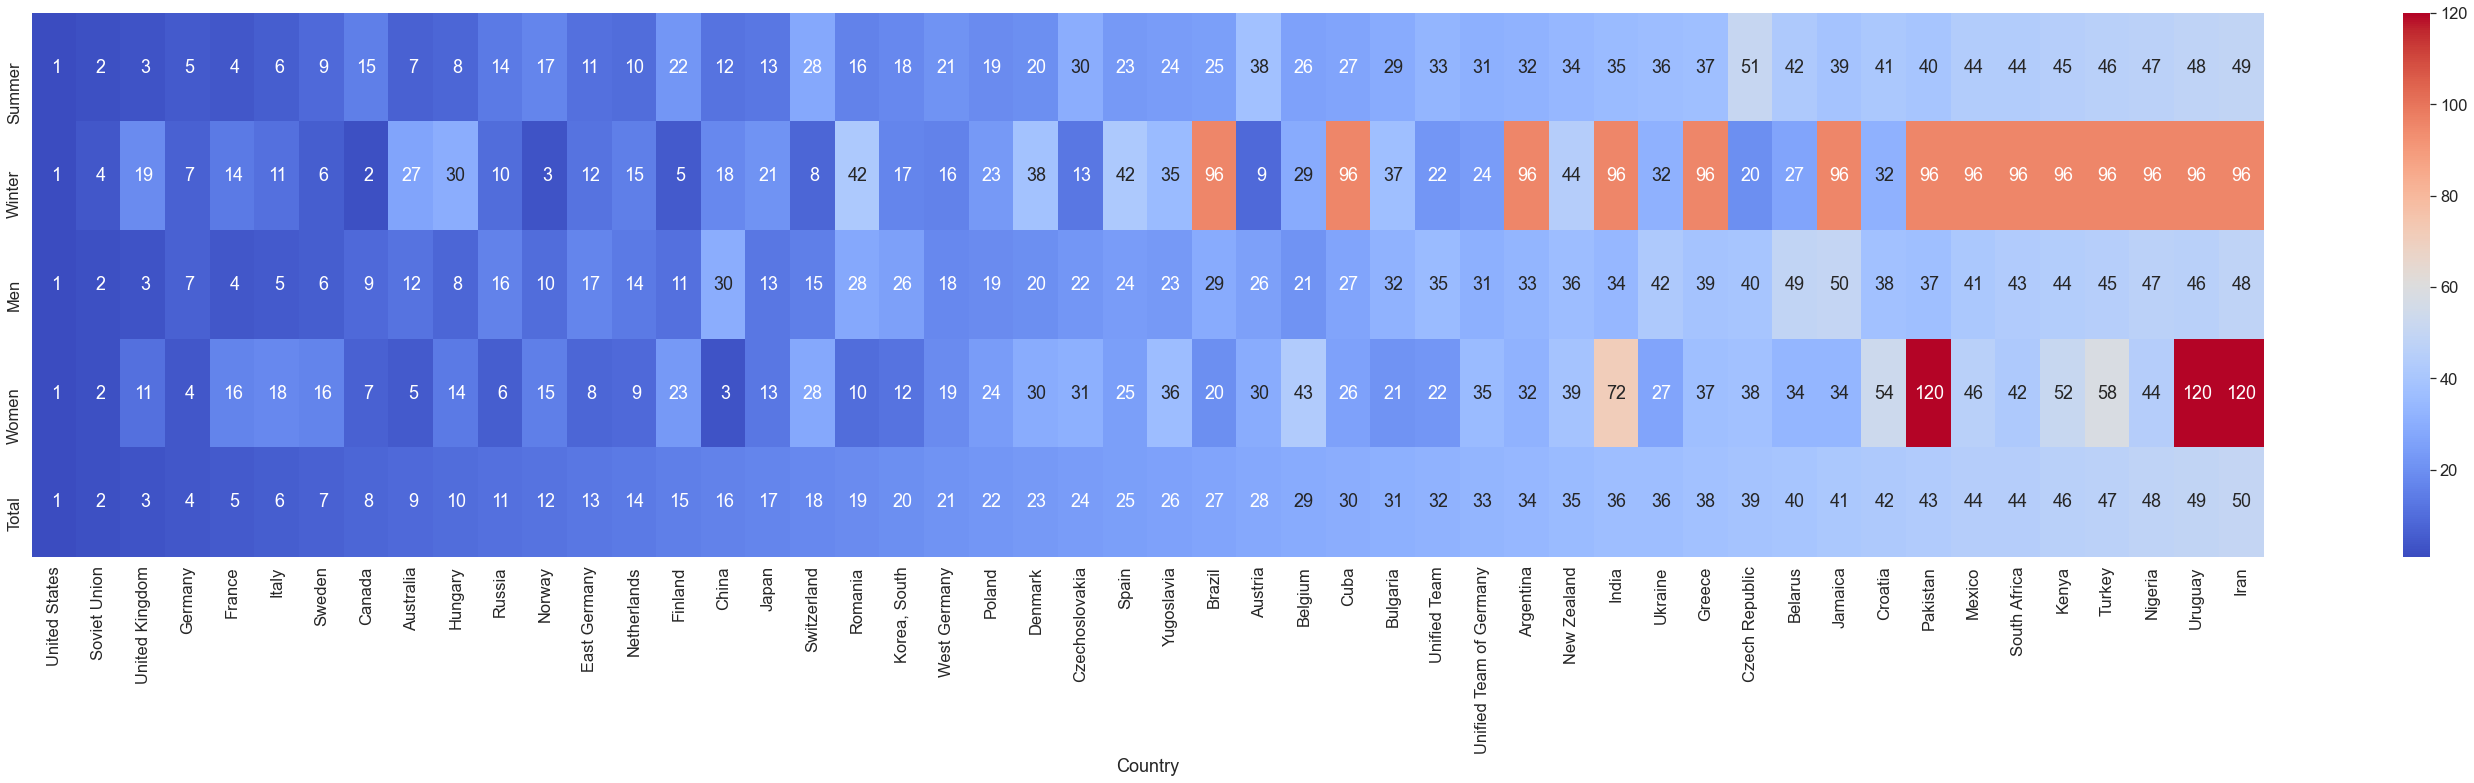

In [127]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.T,cmap='coolwarm',annot=True,fmt='2.0f')
plt.show()

### Does Geographical Location matter?
In this section we explore whether countries are equally successful in the summer as they are in the winter games given their geographic location.  


In [128]:
top_50.sort_values("Summer")

Summer  Winter   Men  Women  Total
Country                                                    
United States               1.0     1.0   1.0    1.0    1.0
Soviet Union                2.0     4.0   2.0    2.0    2.0
United Kingdom              3.0    19.0   3.0   11.0    3.0
France                      4.0    14.0   4.0   16.5    5.0
Germany                     5.0     7.0   7.0    4.0    4.0
Italy                       6.0    11.0   5.0   18.0    6.0
Australia                   7.0    27.0  12.0    5.0    9.0
Hungary                     8.0    30.0   8.0   14.0   10.0
Sweden                      9.0     6.0   6.0   16.5    7.0
Netherlands                10.0    15.0  14.0    9.0   14.0
East Germany               11.0    12.0  17.0    8.0   13.0
China                      12.0    18.0  30.0    3.0   16.0
Japan                      13.0    21.0  13.0   13.0   17.0
Russia                     14.0    10.0  16.0    6.0   11.0
Canada                     15.0     2.0   9.0    7.0    8.0
Romania                    16.0    41.5  28.0   10.0   19.0
Norway                     17.0     3.0  10.0   15.0   12.0
Korea, South               18.0    17.0  25.5   12.0   20.0
Poland                     19.0    23.0  19.0   24.0   22.0
Denmark                    20.0    38.5  20.0   29.5   23.0
West Germany               21.0    16.0  18.0   19.0   21.0
Finland                    22.0     5.0  11.0   23.0   15.0
Spain                      23.0    41.5  24.0   25.0   25.0
Yugoslavia                 24.0    35.0  23.0   36.0   26.0
Brazil                     25.0    95.5  29.0   20.0   27.0
Belgium                    26.0    29.0  21.0   43.0   29.0
Cuba                       27.0    95.5  27.0   26.0   30.0
Switzerland                28.0     8.0  15.0   28.0   18.0
Bulgaria                   29.0    37.0  32.0   21.0   31.0
Czechoslovakia             30.0    13.0  22.0   31.0   24.0
Unified Team of Germany    31.0    24.0  31.0   35.0   33.0
Argentina                  32.0    95.5  33.0   32.0   34.0
Unified Team               33.0    22.0  35.0   22.0   32.0
New Zealand                34.0    44.5  36.0   39.0   35.0
India                      35.0    95.5  34.0   71.5   36.5
Ukraine                    36.0    31.5  42.0   27.0   36.5
Greece                     37.0    95.5  39.0   37.0   38.0
Austria                    38.0     9.0  25.5   29.5   28.0
Jamaica                    39.0    95.5  50.0   33.5   41.0
Pakistan                   40.0    95.5  37.0  120.0   43.0
Croatia                    41.0    31.5  38.0   53.5   42.0
Belarus                    42.0    27.0  49.0   33.5   40.0
Mexico                     43.5    95.5  41.0   46.0   44.5
South Africa               43.5    95.5  43.0   42.0   44.5
Kenya                      45.0    95.5  44.0   51.5   46.0
Turkey                     46.0    95.5  45.0   58.5   47.0
Nigeria                    47.0    95.5  47.0   44.5   48.0
Uruguay                    48.0    95.5  46.0  120.0   49.0
Iran                       49.0    95.5  48.0  120.0   50.0
Czech Republic             51.0    20.0  40.0   38.0   39.0

In [129]:
top_50.sort_values("Winter")

Summer  Winter   Men  Women  Total
Country                                                    
United States               1.0     1.0   1.0    1.0    1.0
Canada                     15.0     2.0   9.0    7.0    8.0
Norway                     17.0     3.0  10.0   15.0   12.0
Soviet Union                2.0     4.0   2.0    2.0    2.0
Finland                    22.0     5.0  11.0   23.0   15.0
Sweden                      9.0     6.0   6.0   16.5    7.0
Germany                     5.0     7.0   7.0    4.0    4.0
Switzerland                28.0     8.0  15.0   28.0   18.0
Austria                    38.0     9.0  25.5   29.5   28.0
Russia                     14.0    10.0  16.0    6.0   11.0
Italy                       6.0    11.0   5.0   18.0    6.0
East Germany               11.0    12.0  17.0    8.0   13.0
Czechoslovakia             30.0    13.0  22.0   31.0   24.0
France                      4.0    14.0   4.0   16.5    5.0
Netherlands                10.0    15.0  14.0    9.0   14.0
West Germany               21.0    16.0  18.0   19.0   21.0
Korea, South               18.0    17.0  25.5   12.0   20.0
China                      12.0    18.0  30.0    3.0   16.0
United Kingdom              3.0    19.0   3.0   11.0    3.0
Czech Republic             51.0    20.0  40.0   38.0   39.0
Japan                      13.0    21.0  13.0   13.0   17.0
Unified Team               33.0    22.0  35.0   22.0   32.0
Poland                     19.0    23.0  19.0   24.0   22.0
Unified Team of Germany    31.0    24.0  31.0   35.0   33.0
Belarus                    42.0    27.0  49.0   33.5   40.0
Australia                   7.0    27.0  12.0    5.0    9.0
Belgium                    26.0    29.0  21.0   43.0   29.0
Hungary                     8.0    30.0   8.0   14.0   10.0
Ukraine                    36.0    31.5  42.0   27.0   36.5
Croatia                    41.0    31.5  38.0   53.5   42.0
Yugoslavia                 24.0    35.0  23.0   36.0   26.0
Bulgaria                   29.0    37.0  32.0   21.0   31.0
Denmark                    20.0    38.5  20.0   29.5   23.0
Spain                      23.0    41.5  24.0   25.0   25.0
Romania                    16.0    41.5  28.0   10.0   19.0
New Zealand                34.0    44.5  36.0   39.0   35.0
India                      35.0    95.5  34.0   71.5   36.5
Cuba                       27.0    95.5  27.0   26.0   30.0
Greece                     37.0    95.5  39.0   37.0   38.0
Brazil                     25.0    95.5  29.0   20.0   27.0
Uruguay                    48.0    95.5  46.0  120.0   49.0
Jamaica                    39.0    95.5  50.0   33.5   41.0
Pakistan                   40.0    95.5  37.0  120.0   43.0
Mexico                     43.5    95.5  41.0   46.0   44.5
South Africa               43.5    95.5  43.0   42.0   44.5
Kenya                      45.0    95.5  44.0   51.5   46.0
Turkey                     46.0    95.5  45.0   58.5   47.0
Nigeria                    47.0    95.5  47.0   44.5   48.0
Argentina                  32.0    95.5  33.0   32.0   34.0
Iran                       49.0    95.5  48.0  120.0   50.0

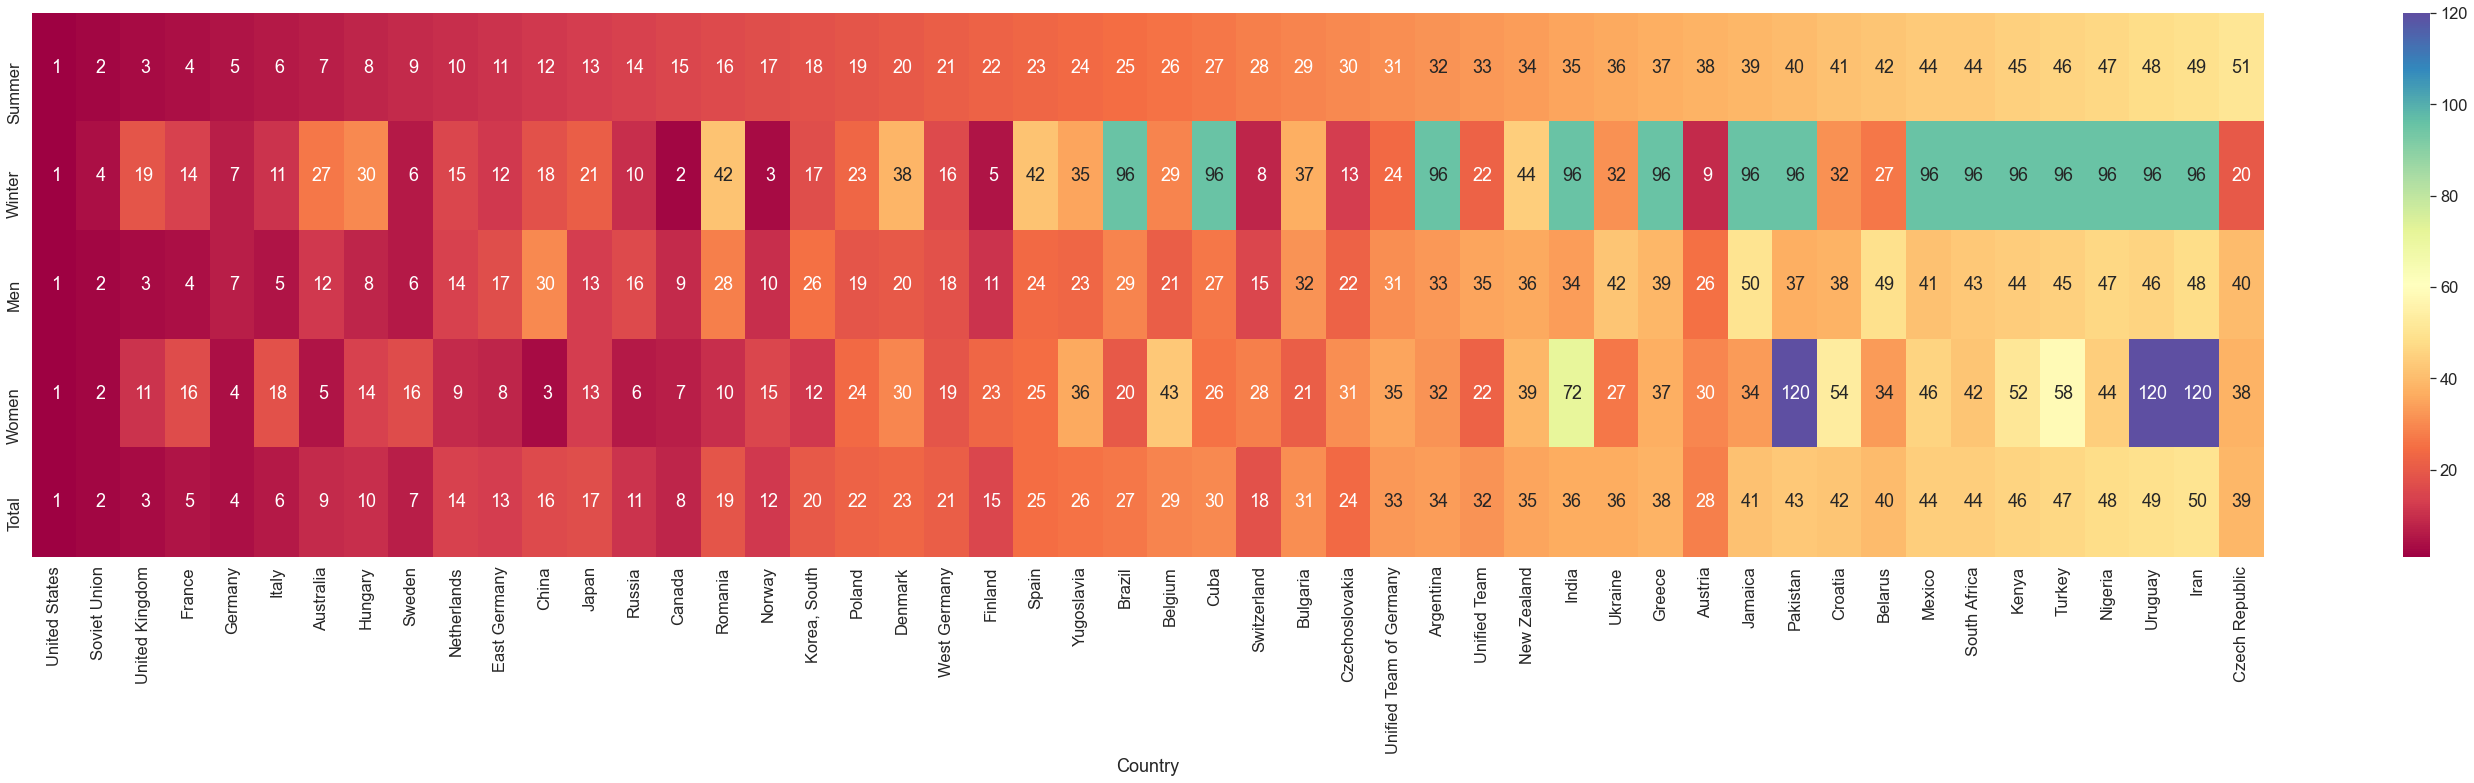

In [139]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Summer").T,cmap='Spectral',annot=True,fmt='2.0f')
plt.show()

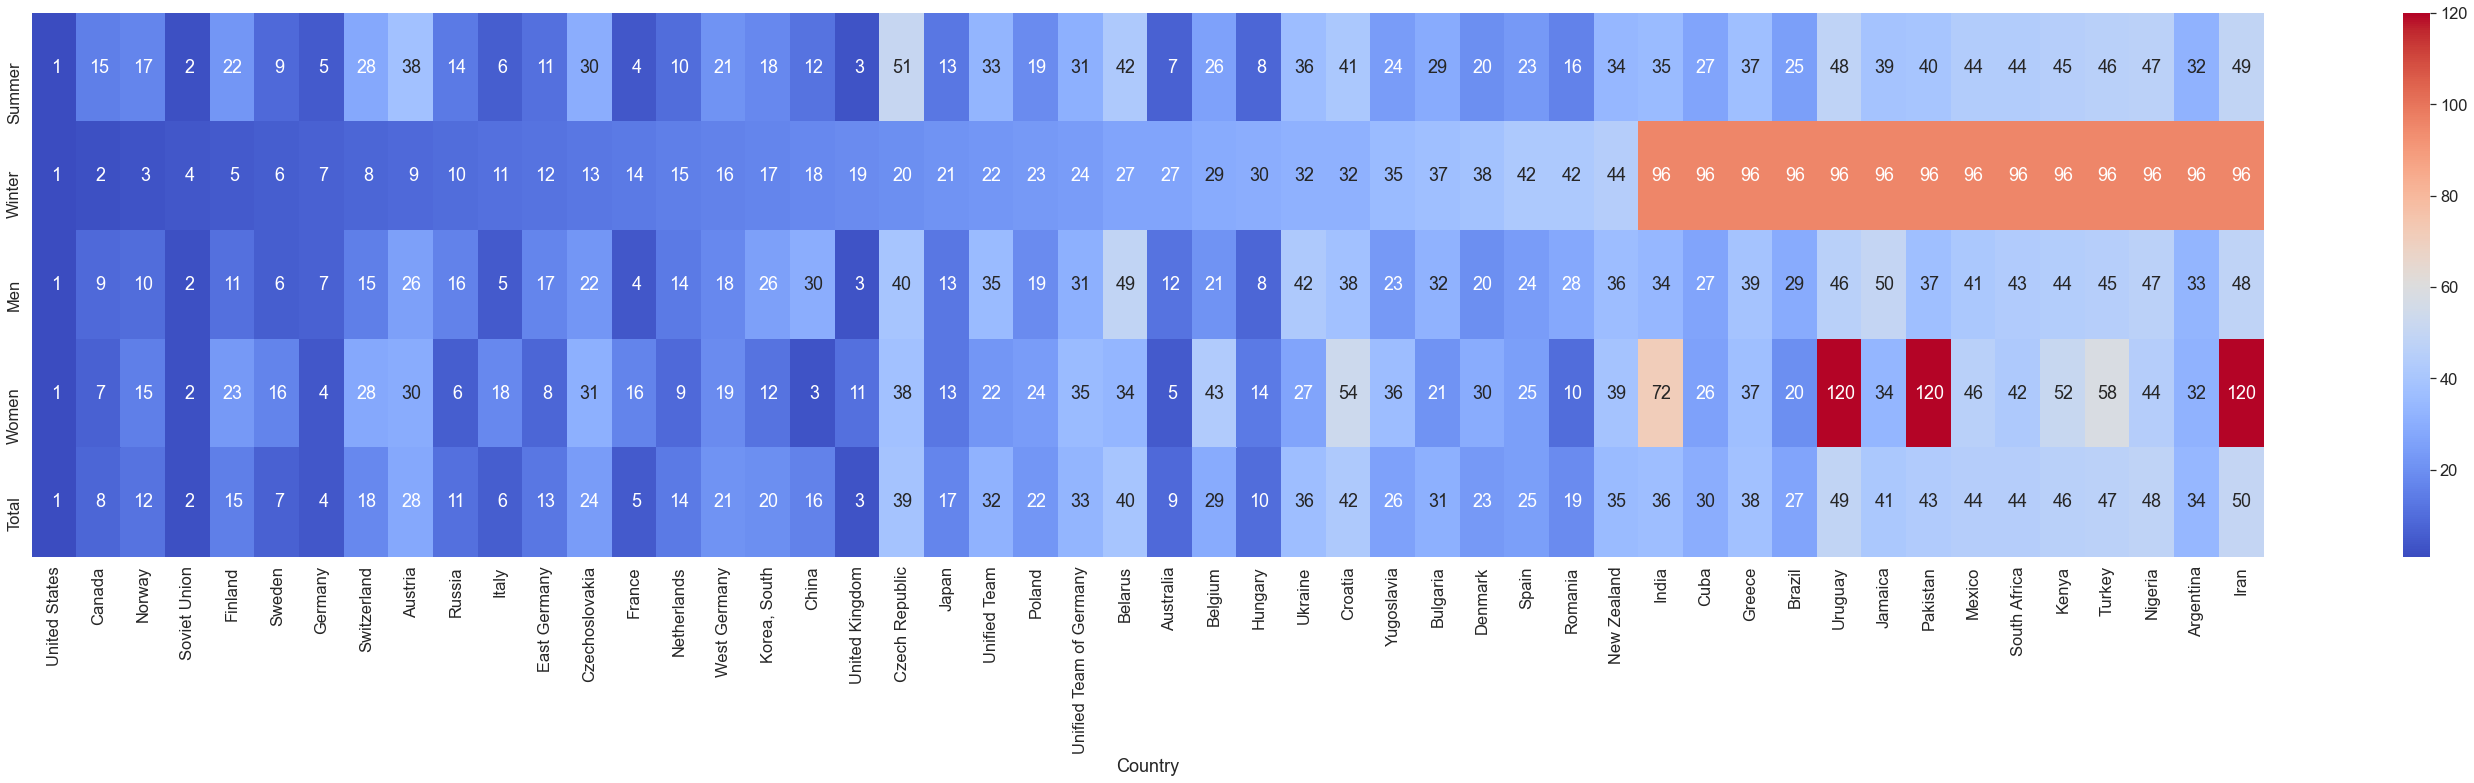

In [141]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Winter").T,cmap='coolwarm',annot=True,fmt='2.0f')
plt.show()

In [153]:
top_50.Summer.sub(top_50.Winter).sort_values()

Country
Brazil                    -70.5
Cuba                      -68.5
Argentina                 -63.5
India                     -60.5
Greece                    -58.5
Jamaica                   -56.5
Pakistan                  -55.5
South Africa              -52.0
Mexico                    -52.0
Kenya                     -50.5
Turkey                    -49.5
Nigeria                   -48.5
Uruguay                   -47.5
Iran                      -46.5
Romania                   -25.5
Hungary                   -22.0
Australia                 -20.0
Denmark                   -18.5
Spain                     -18.5
United Kingdom            -16.0
Yugoslavia                -11.0
New Zealand               -10.5
France                    -10.0
Japan                      -8.0
Bulgaria                   -8.0
China                      -6.0
Netherlands                -5.0
Italy                      -5.0
Poland                     -4.0
Belgium                    -3.0
Soviet Union               -2.0


In [151]:
rank_diff = top_50.Summer.sub(top_50.Winter).sort_values().to_frame()

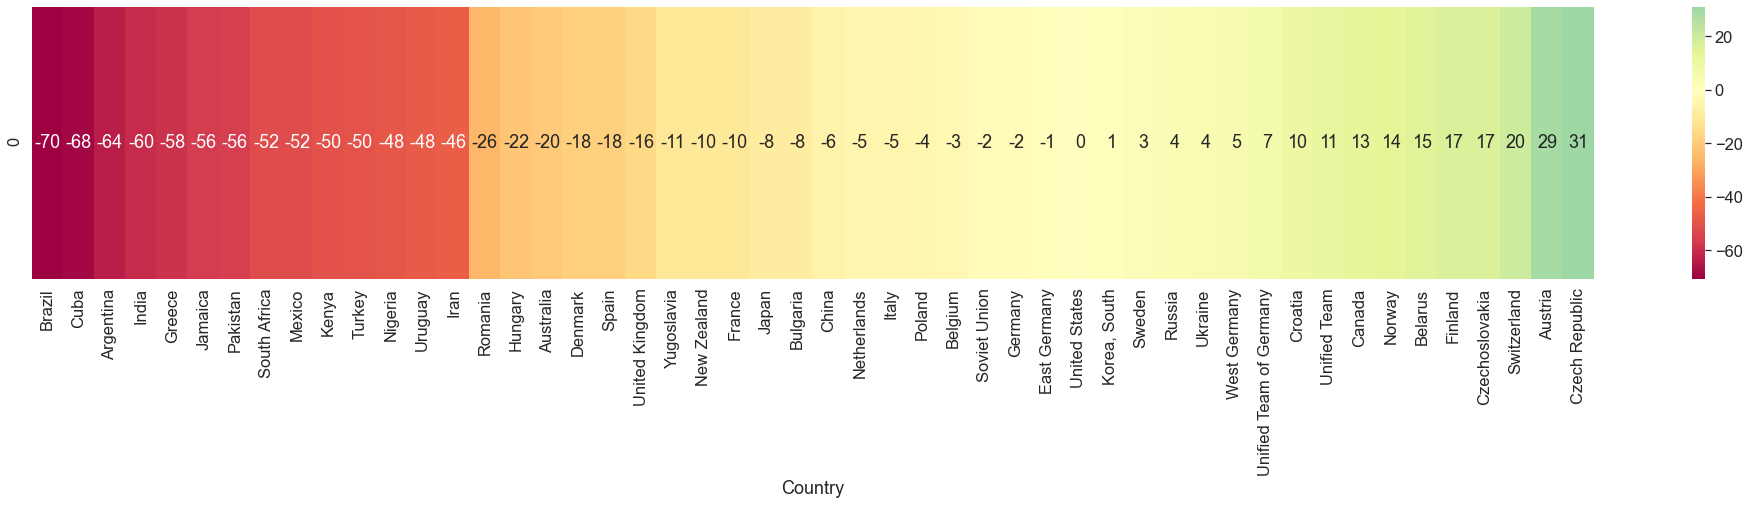

In [138]:
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff.T,cmap='Spectral',annot=True,fmt='2.0f', center = 0)
plt.show()


In summary geographical and climatic diversity can contribute to overall success in both the summer and winter olympic games. In warm colors we see the countries with long summers and access to water bodies, while in green cool colors we see the countries with cold long winters with high mountains. 

In the middle, in yellow we see the countries that benefit from a diverse range of climates. With regions that benefit from both the warm summers and cool winters, they are the countries best poised for success at the Olympic games. 

### Men vs. Women success 

In this section we explore if there are any potential biases towards support of male or female athletes in each country. Of note, this could be due to culture and religions. 

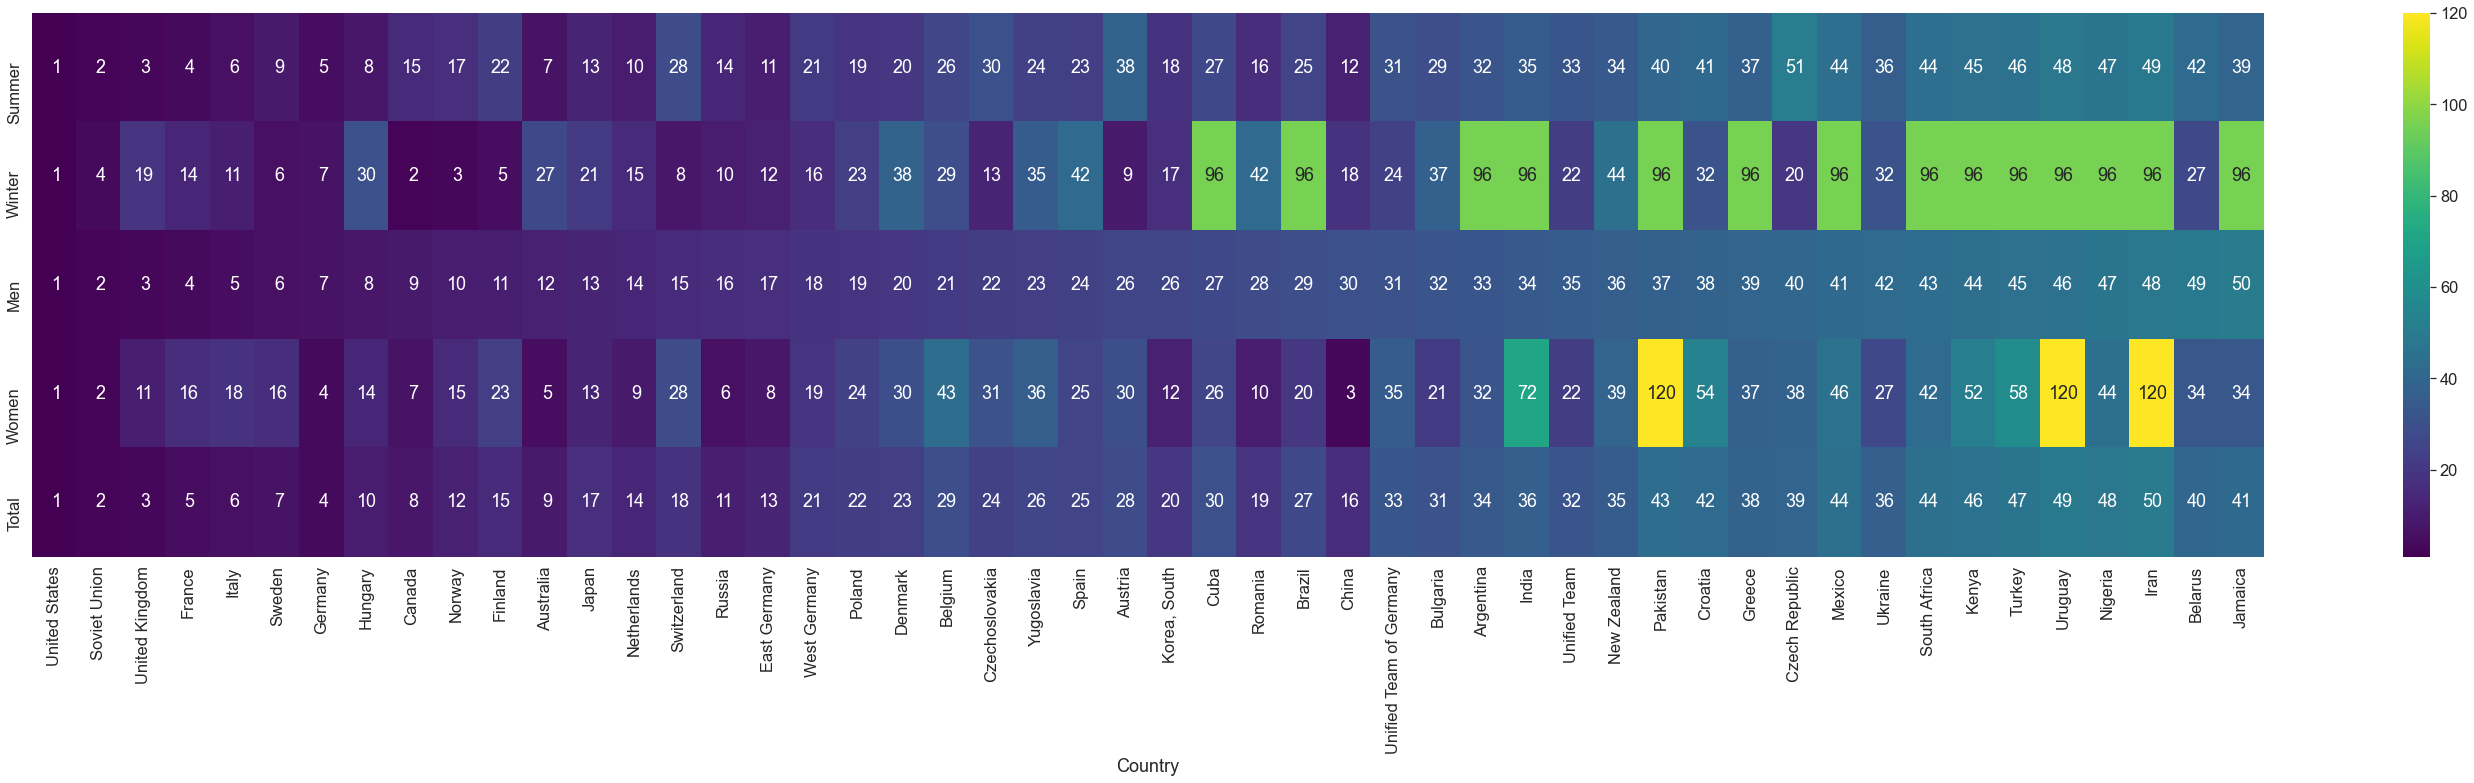

In [145]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Men").T,cmap='viridis',annot=True,fmt='2.0f')
plt.show()

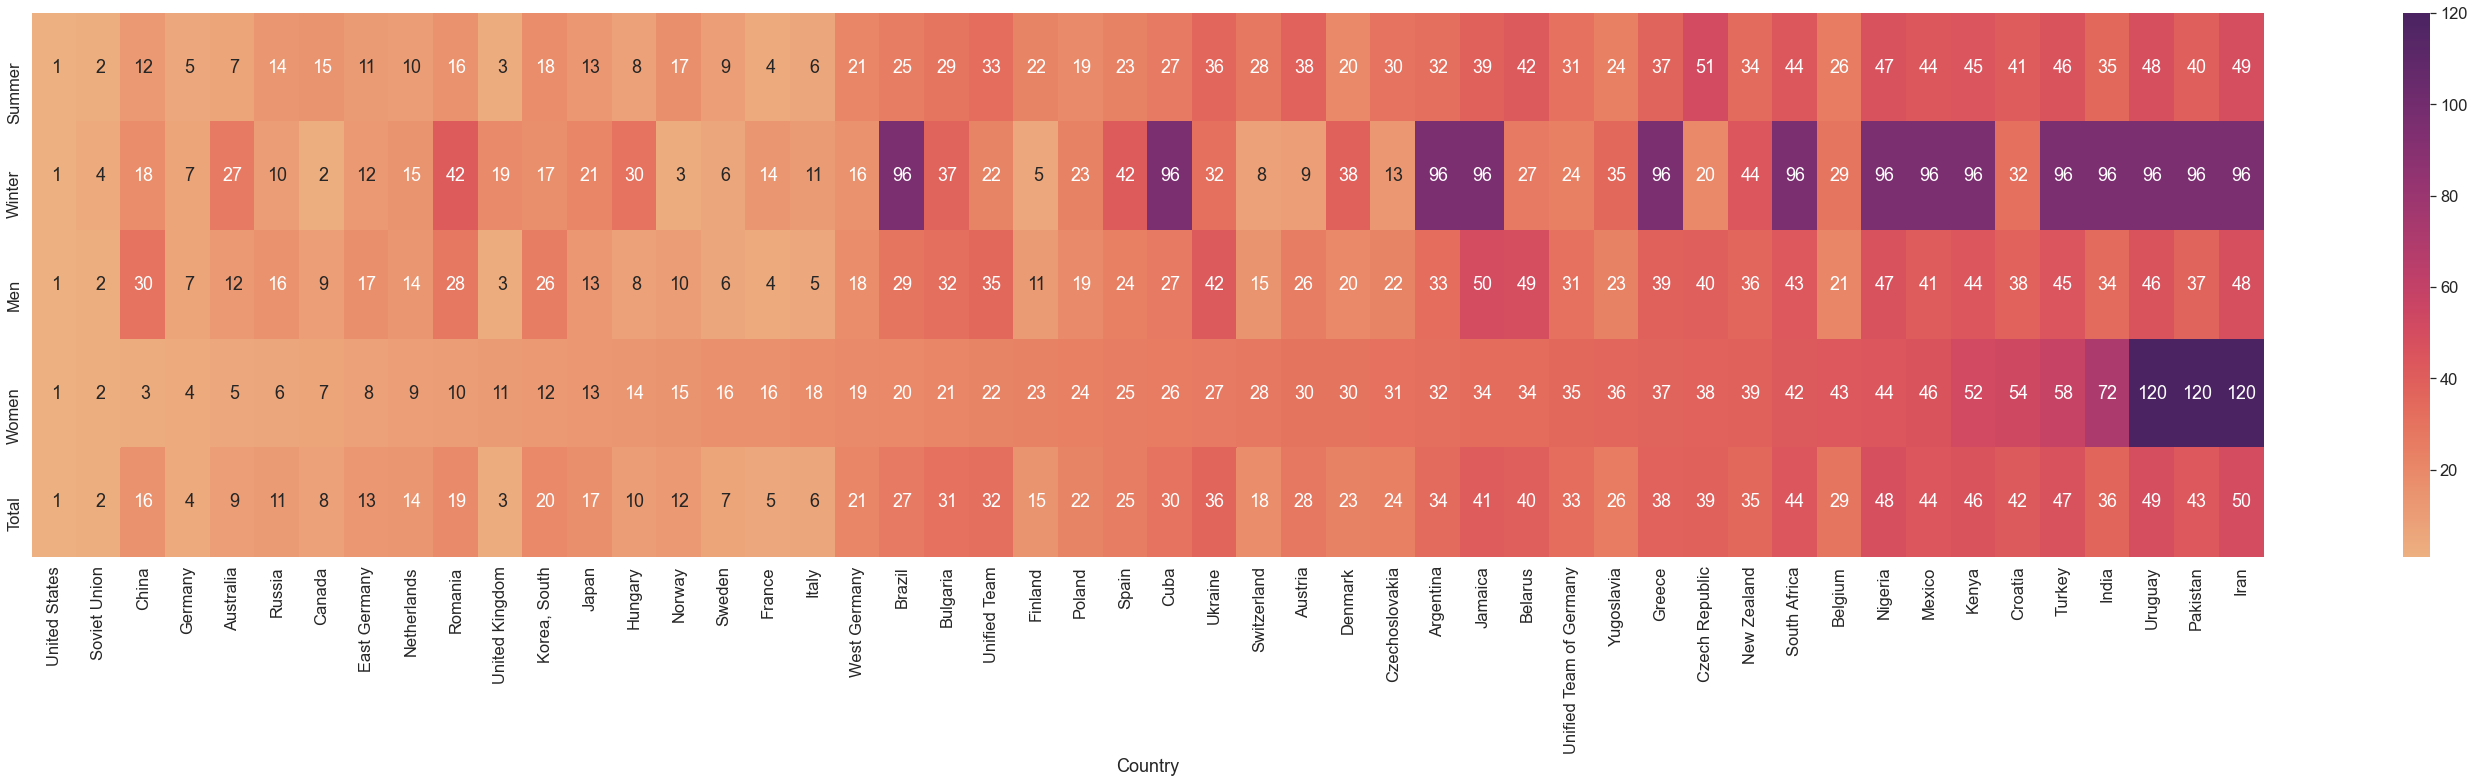

In [146]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Women").T,cmap='flare',annot=True,fmt='2.0f')
plt.show()

In [150]:
rank_diff2 = top_50.Men.sub(top_50.Women).sort_values().to_frame()

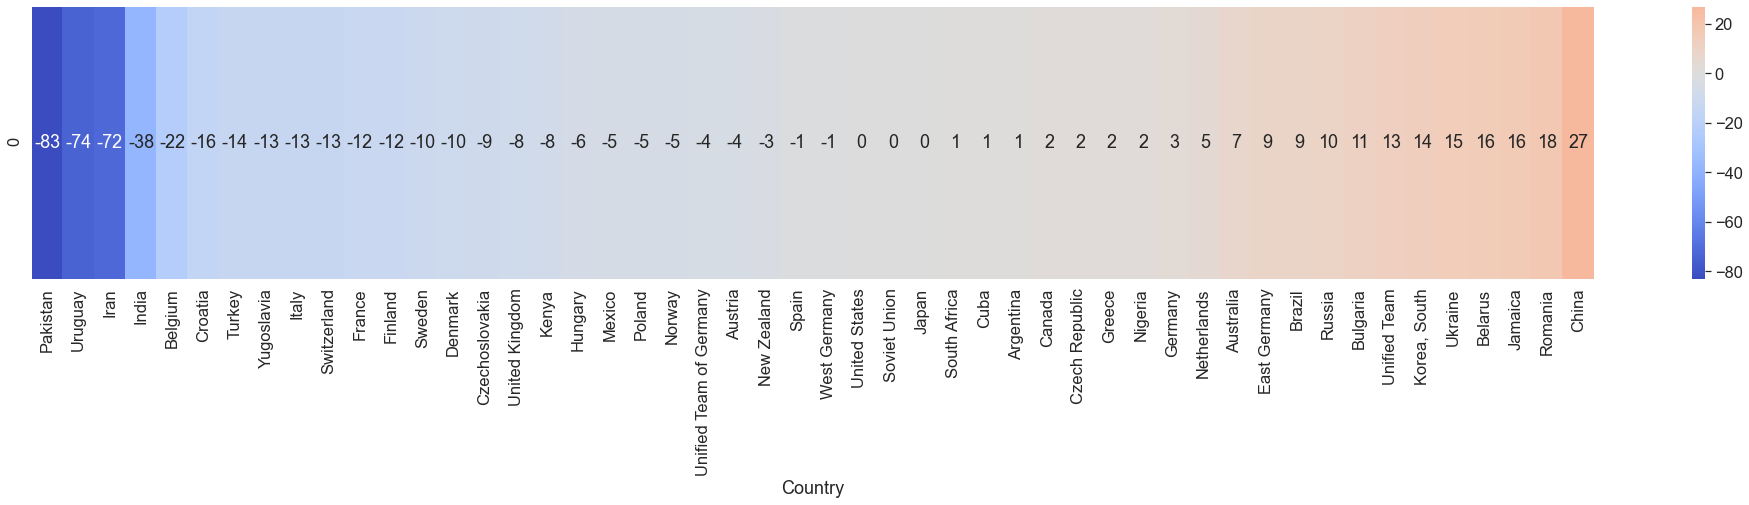

In [149]:
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff2.T,cmap='coolwarm',annot=True,fmt='2.0f', center = 0)
plt.show()

There is evidence of countries who lean towards having more successful male athletes than female athletes. This bias seems more pronounces than the opposite, which is less extreme. That is, female success, might not necessarily mean there is less male athlete support. An interesting expansion would be looking into what professional athletes earn, since for example, male and female athlete success is the same in the US, but it doesn’t seem to be equally enumerated as we saw in the case of the US Women’s national soccer team. 

### Is there evidence of traditional sports we can link to certain countries?
Does the data support the identification of traditional Sports / National Sports for specific countries e.g. UK, Indica, China?

In [154]:
olympics.Sport.value_counts()

Aquatics             4170
Athletics            3637
Rowing               2667
Gymnastics           2307
Skiing               1781
Fencing              1613
Ice Hockey           1563
Football             1497
Hockey               1422
Skating              1256
Wrestling            1211
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         591
Judo                  491
Bobsleigh             452
Biathlon              420
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Luge                  180
Modern Pentathlon     180
Softball              180
Curling               172
Table Tennis          144
Badminton             144
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacrosse    

In [155]:
sports = olympics.Sport.value_counts().index

In [156]:
olympics.Country.value_counts().head(20)

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Russia            1031
Norway            1011
East Germany       987
Netherlands        973
Finland            890
China              889
Japan              851
Switzerland        665
Romania            642
Korea, South       616
Name: Country, dtype: int64

In [157]:
top_20 = olympics.Country.value_counts().head(20).index

In [158]:
by_sport = pd.crosstab(olympics.Country, olympics.Sport)

In [159]:
by_sport = by_sport.rank(ascending = False, method = "average")


In [160]:
by_sport = by_sport.loc[top_20, sports].copy()


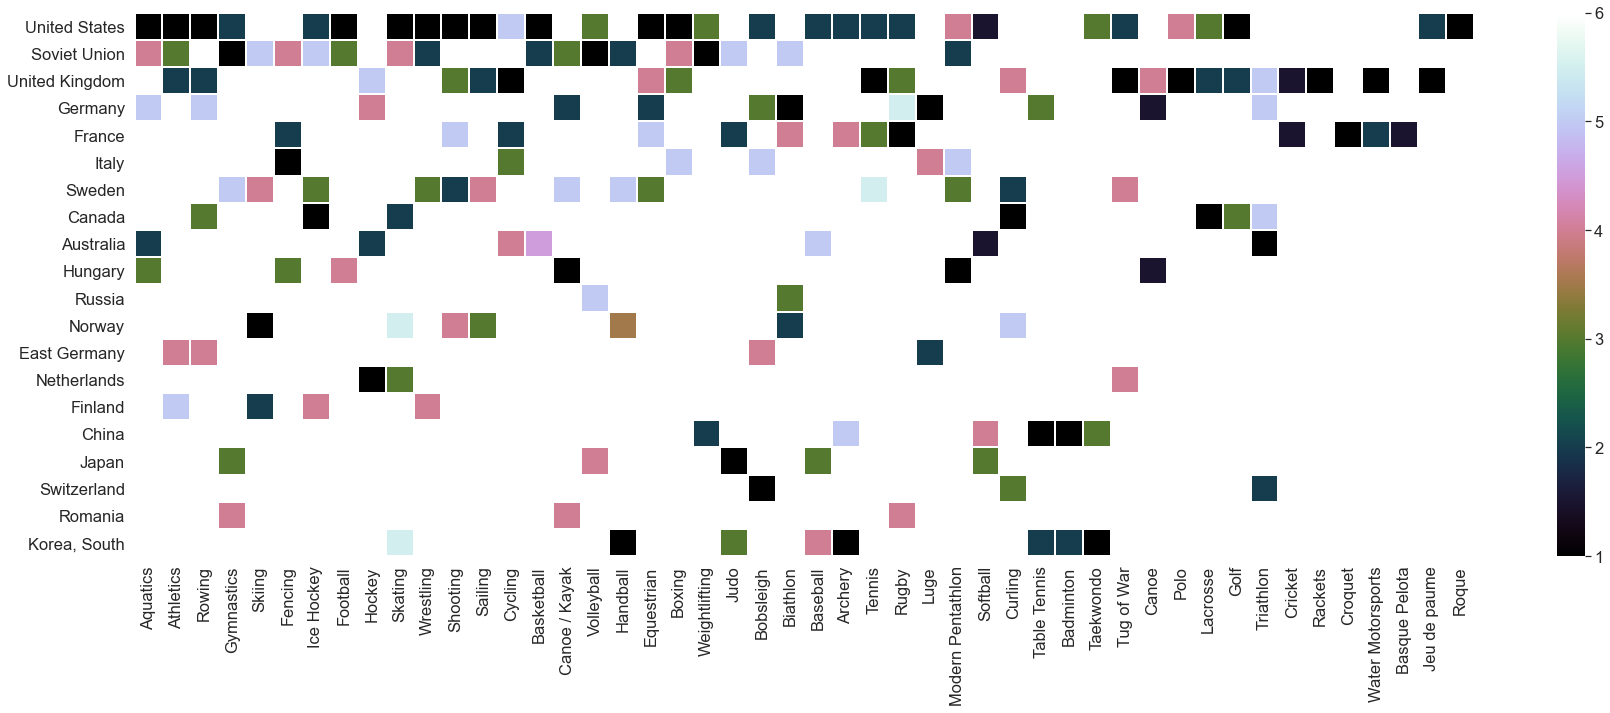

In [163]:
plt.figure(figsize = (30, 10))
sns.heatmap(by_sport,cmap='cubehelix', vmin = 1, vmax = 6, linewidth = 1)
plt.show()

We can definitely see indications that some countries specialize in some sports, though they might be less common and thus awarded less medals for it. We can see that the US specializes in Aquatics, Athletics and Rowing, while the Soviet Union excels at Gymnastics, Volleyball and Weightlifting. Exploring other countries, we see that China’s excels at their national sport of table tennis and badminton. 

## To summarize our findings 

In this notebook, we answered the following:

1. Which countries are most successful at the Olympics?
In general, the following are the most successful countries at the Olympics: 
>United States    
>Soviet Union      
>United Kingdom    
Germany           
France            
Italy             
Sweden            
Canada            
Australia         
Hungary           
2. Does country population influence country success in the Olympics? 
>Yes, it does! 
3. Does country GDP influence country success in the Olympics?
>Yes, it does! 
4. Does the number of times a country has participated in the Olympics influence their success in the Olympics?
>Yes, it does! 
5. Does geogrpahic location influence a country's success in the Olympics?
>Yes, geographical and climatic diversity can contribute to overall success in both the summer and winter olympic games. 
6. Is there a country bias towards male vs female success in the Olympics?
>Yes, there is evidence of countries that have a disproportional number of successful male athletes as female athletes, but maybe not the opposite. 
7. Is there a trend in what could be known as "traditional sports"?
>Yes, there is a correlation between countries and sports that can be considered "traditional"